[Problem Statement](https://gemini.google.com/share/a0080b21faa5)

[Fairlearn Demo](https://fairlearn.org/v0.12/auto_examples/plot_credit_loan_decisions.html#sphx-glr-auto-examples-plot-credit-loan-decisions-py)

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
heart_disease = fetch_ucirepo(id=45) 


In [33]:
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [3]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


For Binning:

In [34]:
bins = [0, 39, 60, 120]  # Bins for <40, 40-60, >60
labels = ['<40', '40-60', '>60']

# Create a new column 'age_category' with the binned ages
X['age_category'] = pd.cut(X['age'], bins=bins, labels=labels, right=True)

In [6]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_category
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,>60
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,>60
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,>60
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,<40
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,40-60


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
sex = X['sex']
age_category = X['age_category']
X_train, X_test, y_train, y_test, A_train, A_test, age_train, age_test = train_test_split(X, y, sex, age_category, test_size=0.2, random_state=42)


Need to encode `age_category`

In [36]:
le = LabelEncoder()
X_train['age_category'] = le.fit_transform(X_train['age_category'])
X_test['age_category'] = le.transform(X_test['age_category'])

X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_category
132,29,1,2,130,204,0,2,202,0,0.0,1,0.0,3.0,1
202,57,1,3,150,126,1,0,173,0,0.2,1,1.0,7.0,0
196,69,1,1,160,234,1,2,131,0,0.1,2,1.0,3.0,2
75,65,0,3,160,360,0,2,151,0,0.8,1,0.0,3.0,2
176,52,1,4,108,233,1,0,147,0,0.1,1,3.0,7.0,0


In [37]:
X_train.isnull().sum() 

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              3
thal            2
age_category    0
dtype: int64

In [44]:
y_test.value_counts()

num
0      29
1      12
2       9
3       7
4       4
Name: count, dtype: int64

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
imputer = SimpleImputer(strategy='mean') 


numerical_features = ['ca', 'thal', 'age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', imputer, numerical_features),
        
        
    ],
    remainder='passthrough'
).set_output( transform="pandas" )


pipeline = Pipeline([
    ('preprocessor', preprocessor),
]
)


X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)



/Users/indranilbhattacharyya/Documents/MLOps/wk_6_practice/.env/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/indranilbhattacharyya/Documents/MLOps/wk_6_practice/.env/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/indranilbhattacharyya/Documents/MLOps/wk_6_practice/.env/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/indranilbhattacharyya/Documents/MLOps/wk_6_practice/.env/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value

In [41]:
import pandas as pd
from fairlearn.metrics import MetricFrame, demographic_parity_difference




print("Demographic Parity Difference:", demographic_parity_difference(y_test, y_test_pred, sensitive_features=A_test))
print("Demographic Parity Difference:", demographic_parity_difference(y_train, y_train_pred, sensitive_features=A_train))

print("Demographic Parity Difference:", demographic_parity_difference(y_test, y_test_pred, sensitive_features=age_test))
print("Demographic Parity Difference:", demographic_parity_difference(y_train, y_train_pred, sensitive_features=age_train))


Demographic Parity Difference: 0.03495440729483283
Demographic Parity Difference: 0.17716147609305147
Demographic Parity Difference: 0.2727272727272727
Demographic Parity Difference: 0.14705882352941177


In [50]:
import fairlearn
print(fairlearn.__version__)

0.12.0


In [42]:
import numpy as np
from fairlearn.metrics import equalized_odds_difference

classes = np.unique(y_test)

results = {}

for cls in classes:
    # Convert to binary: current class vs rest
    y_true_bin = (y_test == cls).astype(int)
    y_pred_bin = (y_test_pred == cls).astype(int)

    diff = equalized_odds_difference(
        y_true=y_true_bin,
        y_pred=y_pred_bin,
        sensitive_features=A_test
    )
    results[cls] = diff

print("Equalized Odds Difference (per class):")
for cls, val in results.items():
    print(f"Class {cls}: {val}")


Equalized Odds Difference (per class):
Class 0: 0.2857142857142857
Class 1: 0.09090909090909091
Class 2: 0.16666666666666666
Class 3: 0.2857142857142857
Class 4: 0.0


In [43]:
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score
from fairlearn.metrics import MetricFrame

metrics_to_report = {
    "balanced_accuracy": balanced_accuracy_score,
    "precision_macro": lambda y_true, y_pred: precision_score(y_true, y_pred, average="macro"),
    "recall_macro": lambda y_true, y_pred: recall_score(y_true, y_pred, average="macro"),
}

mf = MetricFrame(
    metrics=metrics_to_report,
    y_true=y_test,
    y_pred=y_test_pred,
    sensitive_features=A_test
)

print("Overall metrics:")
print(mf.overall)

print("\nGroup-wise metrics:")
print(mf.by_group)


Overall metrics:
balanced_accuracy    0.297564
precision_macro      0.267044
recall_macro         0.297564
dtype: float64

Group-wise metrics:
     balanced_accuracy  precision_macro  recall_macro
sex                                                  
0             0.411111         0.454545      0.308333
1             0.287605         0.249731      0.287605


/Users/indranilbhattacharyya/Documents/MLOps/wk_6_practice/.env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/indranilbhattacharyya/Documents/MLOps/wk_6_practice/.env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/indranilbhattacharyya/Documents/MLOps/wk_6_practice/.env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/indranilbhattacharyya/

# Shap Experimentation

In [54]:
!pip install -q shap
!pip install -q matplotlib

You should consider upgrading via the '/Users/indranilbhattacharyya/Documents/MLOps/wk_6_practice/.env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/indranilbhattacharyya/Documents/MLOps/wk_6_practice/.env/bin/python3 -m pip install --upgrade pip' command.


In [24]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_category
132,29,1,2,130,204,0,2,202,0,0.0,1,0.0,3.0,1
202,57,1,3,150,126,1,0,173,0,0.2,1,1.0,7.0,0
196,69,1,1,160,234,1,2,131,0,0.1,2,1.0,3.0,2
75,65,0,3,160,360,0,2,151,0,0.8,1,0.0,3.0,2
176,52,1,4,108,233,1,0,147,0,0.1,1,3.0,7.0,0


Generating SHAP summary plot for class 0...


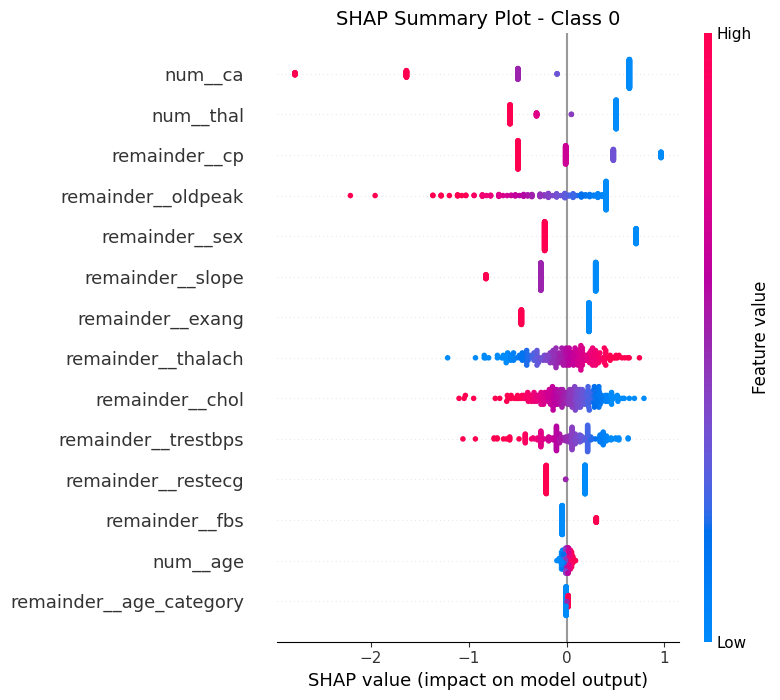

Generating SHAP summary plot for class 1...


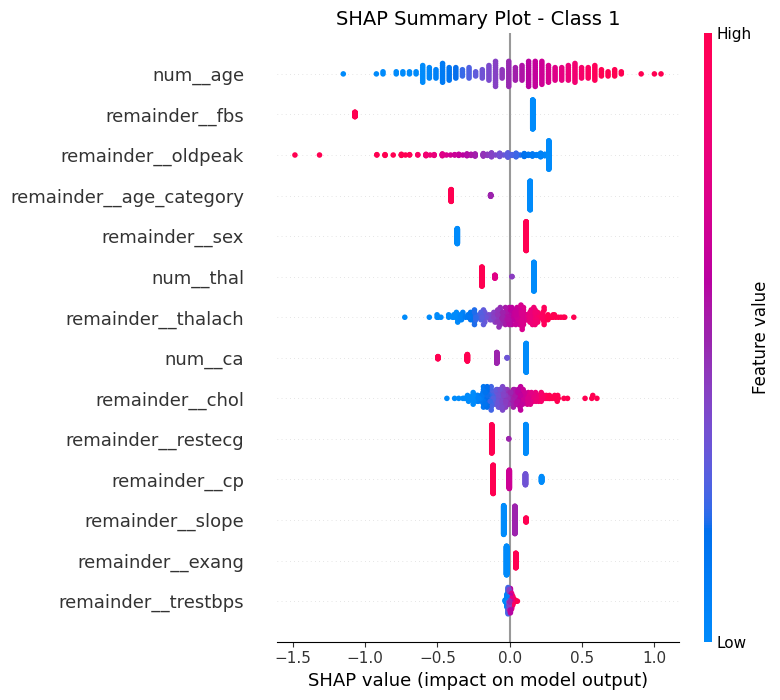

Generating SHAP summary plot for class 2...


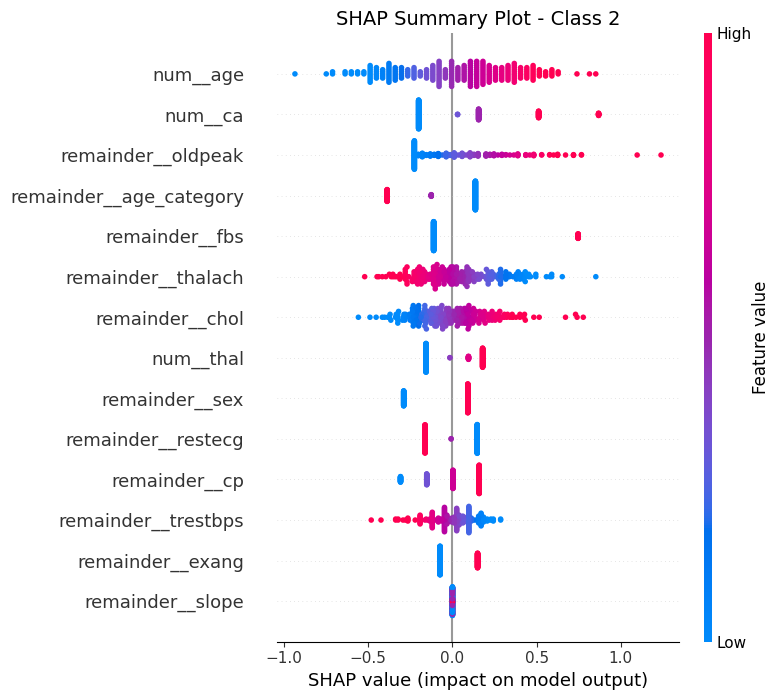

Generating SHAP summary plot for class 3...


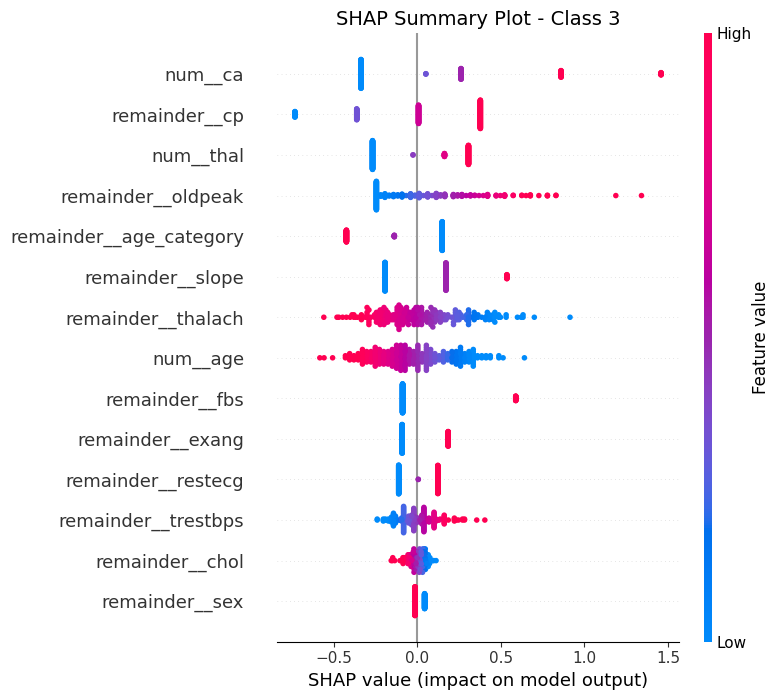

Generating SHAP summary plot for class 4...


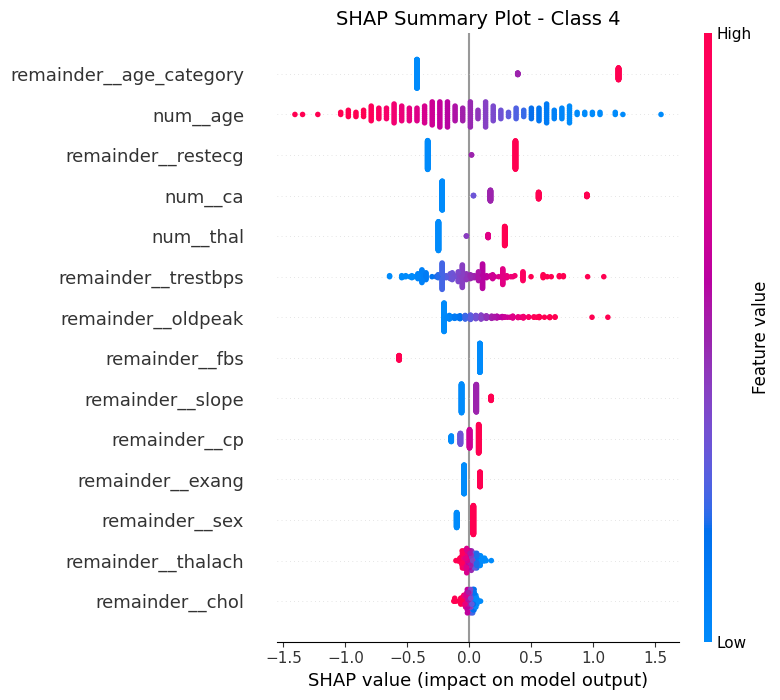

In [65]:
import shap
import matplotlib.pyplot as plt

# Assuming X_train is a DataFrame with column names
explainer = shap.Explainer(model, X_train, model_output="probability")
shap_values = explainer(X_train)

# Number of target classes
n_classes = shap_values.values.shape[-1]

# Generate summary plot for each class
for class_idx in range(n_classes):
    print(f"Generating SHAP summary plot for class {class_idx}...")
    shap.summary_plot(
        shap_values[..., class_idx],
        X_train,
        show=False
    )
    plt.title(f"SHAP Summary Plot - Class {class_idx}", fontsize=14)
    plt.tight_layout()
    plt.show()


In [56]:
shap.initjs()

In [82]:
class_idx = 0
shap.plots.force(shap_values[0, :, class_idx])

In [75]:
class_idx = 1
shap.plots.force(shap_values[0, :, class_idx])

In [83]:
class_idx = 0
shap.plots.force(shap_values[100, :, class_idx])

In [67]:
import shap

class_idx = 1
sample_idx = 0

# pick out values and base value for that class
vals = shap_values.values[sample_idx, :, class_idx]
base_val = shap_values.base_values[sample_idx, class_idx]

# rebuild Explanation object for just this sample & class
single_expl = shap.Explanation(
    values=vals,
    base_values=base_val,
    data=X.iloc[sample_idx],
    feature_names=X.columns
)

# now force plot works
shap.plots.force(single_expl)


In [70]:
import shap

class_idx = 0
sample_idx = 0

# pick out values and base value for that class
vals = shap_values.values[sample_idx, :, class_idx]
base_val = shap_values.base_values[sample_idx, class_idx]

# rebuild Explanation object for just this sample & class
single_expl = shap.Explanation(
    values=vals,
    base_values=base_val,
    data=X_train.iloc[sample_idx],
)

# now force plot works
shap.plots.force(single_expl)


In [84]:
!pip install evidently -q

You should consider upgrading via the '/Users/indranilbhattacharyya/Documents/MLOps/wk_6_practice/.env/bin/python3 -m pip install --upgrade pip' command.


In [87]:
import pandas as pd
from evidently import Report
from evidently import Dataset, DataDefinition
from evidently.descriptors import Sentiment, TextLength, Contains
from evidently.presets import TextEvals
from evidently.presets import DataDriftPreset


In [90]:
report = Report([
    DataDriftPreset()
],
include_tests="True")
my_eval = report.run(X_train, X_test)
my_eval.save_html("data_drift_report.html")


/Users/indranilbhattacharyya/Documents/MLOps/wk_6_practice/.env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7985: RuntimeWarning:

divide by zero encountered in divide

/Users/indranilbhattacharyya/Documents/MLOps/wk_6_practice/.env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7985: RuntimeWarning:

divide by zero encountered in divide

/Users/indranilbhattacharyya/Documents/MLOps/wk_6_practice/.env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7985: RuntimeWarning:

divide by zero encountered in divide

